In [1]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/Users/Oconer/OneDrive/Desktop/Titanic-Dataset.csv')

In [309]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)
#Se eliminaron algunas columnas del datasent

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.383838,3,22.0,1.000000,0.381594,7.2500
1,2,1.000000,1,38.0,1.000000,0.381594,71.2833
2,3,1.000000,3,26.0,0.523008,0.381594,7.9250
3,4,1.000000,1,35.0,1.000000,0.381594,53.1000
4,5,0.383838,3,35.0,0.523008,0.381594,8.0500
6,7,0.383838,1,54.0,0.523008,0.381594,51.8625
8,9,1.000000,3,27.0,0.523008,2.000000,11.1333
11,12,1.000000,1,58.0,0.523008,0.381594,26.5500
13,14,0.383838,3,39.0,1.000000,5.000000,31.2750
15,16,1.000000,2,55.0,0.523008,0.381594,16.0000


In [240]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,450.902804,0.623393,2.125234,35.402804,0.706953,0.631763,36.314360
std,252.995844,0.300644,0.853073,11.686082,0.367925,0.721279,56.212851
min,1.000000,0.383838,1.000000,20.500000,0.523008,0.381594,0.000000
25%,238.500000,0.383838,1.000000,26.000000,0.523008,0.381594,8.050000
50%,453.000000,0.383838,2.000000,32.500000,0.523008,0.381594,15.245800
75%,665.000000,1.000000,3.000000,42.000000,1.000000,0.381594,35.500000
max,891.000000,1.000000,3.000000,80.000000,3.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

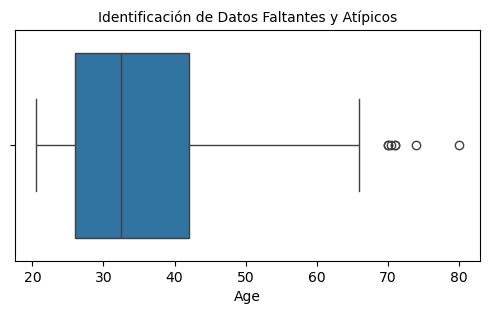

In [242]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [244]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Parch: ",Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Datos['Survived'].isin([0]).sum())

Cantidad de Registros con cero en Parch:  0
Cantidad de Registros con cero en SibSp:  0
Cantidad de Registros con cero en Survived:  0


In [246]:
Datos['Parch']=Datos['Parch'].replace(0,Datos['Parch'].mean())
Datos['SibSp']=Datos['SibSp'].replace(0,Datos['SibSp'].mean())
Datos['Survived']=Datos['Survived'].replace(0,Datos['Survived'].mean())

In [248]:
#Revisión nuevamente de datos faltantes
print("Cantidad de Registros con cero en Parch: ",Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Datos['Survived'].isin([0]).sum())

Cantidad de Registros con cero en Parch:  0
Cantidad de Registros con cero en SibSp:  0
Cantidad de Registros con cero en Survived:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

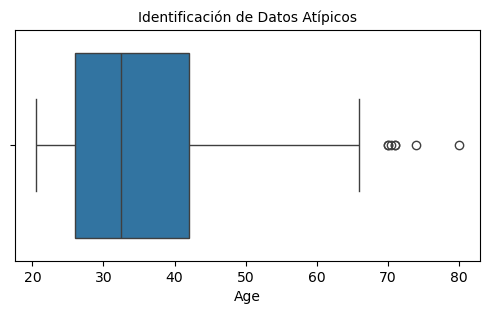

In [250]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [252]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [254]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [256]:
#Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [258]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  535 non-null    int64  
 1   Survived     535 non-null    float64
 2   Pclass       535 non-null    int64  
 3   Age          535 non-null    float64
 4   SibSp        535 non-null    float64
 5   Parch        535 non-null    float64
 6   Fare         535 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.6 KB


In [260]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
# Total Supervivientes

Datos['Survived'].value_counts()

Survived
0.383838    327
1.000000    208
Name: count, dtype: int64

In [262]:
Datos[['Survived']].head(40)

,Survived
0,0.383838
1,1.000000
2,1.000000
3,1.000000
4,0.383838
6,0.383838
8,1.000000
11,1.000000
13,0.383838
15,1.000000


In [264]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [266]:
print (X_train)

     PassengerId  Pclass   Age     SibSp     Parch      Fare
18            19       3  31.0  1.000000  0.381594   18.0000
263          264       1  40.0  0.523008  0.381594    0.0000
493          494       1  71.0  0.523008  0.381594   49.5042
659          660       1  58.0  0.523008  2.000000  113.2750
594          595       2  37.0  1.000000  0.381594   26.0000
..           ...     ...   ...       ...       ...       ...
695          696       2  52.0  0.523008  0.381594   13.5000
620          621       3  27.0  1.000000  0.381594   14.4542
551          552       2  27.0  0.523008  0.381594   26.0000
670          671       2  40.0  1.000000  1.000000   39.0000
520          521       1  30.0  0.523008  0.381594   93.5000

[401 rows x 6 columns]


In [268]:
print (Y_train)

18     0.383838
263    0.383838
493    0.383838
659    0.383838
594    0.383838
         ...   
695    0.383838
620    0.383838
551    0.383838
670    1.000000
520    1.000000
Name: Survived, Length: 401, dtype: float64


Intercepto (β0): 34.64094192431824
Coeficiente (Fare, β1): [0.02097963]


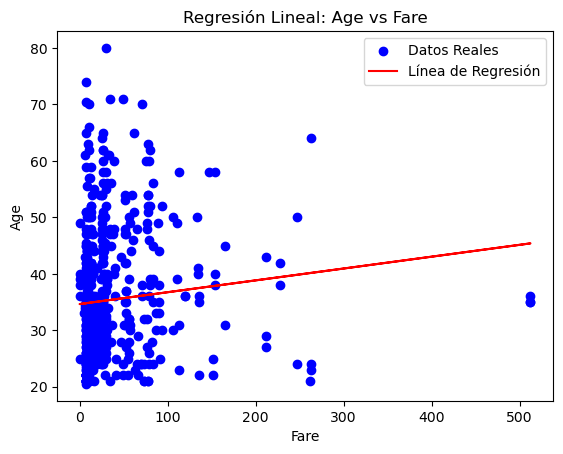

In [329]:
5# Construir el modelo de regresión Lineal
# Convertir los datos en un DataFrame
df = pd.DataFrame(Datos)

# Variables independientes ( Fare) y dependiente (Age)
X = df[['Fare']]
y = df['Age']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (Fare y Age)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Fare, β1): {beta_1}")


#6 Grafica que permita visualizar los resultados del modelo
# Visualizar la regresión (opcional para datos simples)

plt.scatter(df['Fare'], y, color='blue', label='Datos Reales')
plt.plot(df['Fare'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Age vs Fare')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend()
plt.show()

In [319]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[40], [55]])  # Nuevos valores (Fare, Age)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Fare: {nuevo_X[i][0]}): {pred:.2f} ")


Predicciones:
Predicción 1 para (Fare: 40): 35.48 
Predicción 2 para (Fare: 55): 35.79 


C:\Users\Oconer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
